<a href="https://colab.research.google.com/github/Hero0963/data_science_camp_level2/blob/main/task07/dscamp_lv2_task07_hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#練習：將 `winequality-both` 資料的後 10 筆資料當成「測試資料」、其餘資料作為「訓練資料」；想要利用除了 type、quality 之外的欄位（X） 對 quality 欄位（y） 進行迴歸分析。請試著完成以下的程式碼，並且解釋 A、B、C 三行程式碼分別在做什麼。

In [ ]:
import pandas as pd
import statsmodels.api as sm

source = 'https://raw.githubusercontent.com/cbrownley/foundations-for-analytics-with-python/master/statistics/winequality-both.csv'
df = pd.read_csv(source)

display(df)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
test_data_count = 10
test = df[-test_data_count:]
display("test data = ")
display(test)
print()
testy = test['quality']
testX = sm.add_constant(test[test.columns.difference(['type','quality'])])

n = len(df)
train = df[0: n- 1 - test_data_count]
display("train data = ")
display(train)
print()
y = train['quality']
X = sm.add_constant(train[train.columns.difference(['type','quality'])])

model = sm.OLS(y, X).fit() # A 使用ordinary least squares model 進行訓練

display("model.summary() = ")
display(model.summary()) # B model.summary() 是 statsmodels 中的一個函數，用於顯示線性回歸模型的結果摘要。這個函數會顯示模型的參數估計值、標準誤、t 值、p 值和信賴區間
print()

display("predict = ")
display(model.predict(testX)) # C 對測試資料的 quality 值 進行預測

'test data = '

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,white,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
6488,white,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
6489,white,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
6490,white,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
6491,white,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
6492,white,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,white,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


'train data = '

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6481,white,5.5,0.32,0.13,1.3,0.037,45.0,156.0,0.99184,3.26,0.38,10.70,5
6482,white,4.9,0.47,0.17,1.9,0.035,60.0,148.0,0.98964,3.27,0.35,11.50,6
6483,white,6.5,0.33,0.38,8.3,0.048,68.0,174.0,0.99492,3.14,0.50,9.60,5
6484,white,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.55,6


'model.summary() = '

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     242.5
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        08:19:30   Log-Likelihood:                -7206.9
No. Observations:                6486   AIC:                         1.444e+04
Df Residuals:                    6474   BIC:                         1.452e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   55.9966     11.902      4.705      0.000      32.664      79.329
alcohol                  0.2664      0.017     15.914      0.000       0.234       0.299
chlorides               -0.4830      0.333     -1.451      0.147      -1.136       0.170
citric acid             -0.1077      0.080     -1.351      0.177      -0.264       0.049
density                -55.2092     12.146     -4.545      0.000     -79.020     -31.398
fixed acidity            0.0681      0.016      4.365      0.000       0.037       0.099
free sulfur dioxide      0.0060      0.001      7.967      0.000       0.005       0.007
pH                       0.4423      0.091      4.886      0.000       0.265       0.620
residual sugar           0.0436      0.005      8.450      0.000       0.033       0.054
sulphates                0.7677      0.076     10.072      0.000       0.618       0.917
total sulfur dioxide    -0.0025      0.000     -8.970      0.000      -0.003      -0.002
volatile acidity        -1.3274      0.077    -17.142      0.000      -1.479      -1.176
==============================================================================
Omnibus:                      143.443   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.860
Skew:                          -0.006   Prob(JB):                     7.80e-71
Kurtosis:                       4.093   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'predict = '

6487    5.438973
6488    5.688367
6489    6.121338
6490    5.931656
6491    5.661950
6492    6.168883
6493    5.608980
6494    5.419165
6495    6.432113
6496    6.205762
dtype: float64

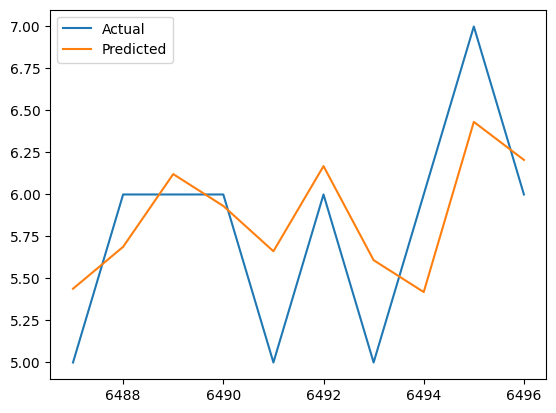

In [ ]:

import matplotlib.pyplot as plt

y_test = testy
y_pred = model.predict(testX)
# print(type(y_pred))

fig, ax = plt.subplots()
ax.plot(y_test, label='Actual')
ax.plot(y_pred, label='Predicted')
ax.legend()
plt.show()